In [1]:
# -*- coding: utf-8 -*-

# dependencies
from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import random
from matplotlib.lines import Line2D
from scipy import interpolate
import csv
import pandas as pd

In [2]:
data_path = 'src'
!mkdir {data_path}

In [26]:
font_dirs = ["/content/src/"]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

fontprop1 = fm.FontProperties(fname=font_files[1], size=24)
fontprop2 = fm.FontProperties(fname=font_files[0], size=25)

chars:  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 3, 4, 4, 5, 0, 6, 7, 8, 9, 10, 10, 11, 12, 13, 14, 1, 3, 0, 2, 13, 1, 3, 4]
chars size:  34
y_pos [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 3, 4, 4, 5, 0, 6, 7, 8, 9, 10, 10, 11, 12, 13, 14, 1, 3, 0, 2, 13, 1, 3, 4]
rhy_map [0.64, 0.76, 0.88, 1.0, 1.12, 1.24, 1.36, 1.49, 1.61, 1.73, 0.27, 0.51, 0.64, 0.64, 0.76, 0.15, 0.88, 1.0, 1.12, 1.24, 1.36, 1.36, 1.49, 1.61, 1.73, 1.85, 0.27, 0.51, 0.15, 0.39, 1.73, 0.27, 0.51, 0.64]
pi_map [44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 41.0, 43.0, 44.0, 44.0, 45.0, 40.0, 46.0, 47.0, 48.0, 49.0, 50.0, 50.0, 51.0, 52.0, 53.0, 54.0, 41.0, 43.0, 40.0, 42.0, 53.0, 41.0, 43.0, 44.0]
rhythms:  [1.6, 1.92, 2.2800000000000002, 2.64, 3.0, 3.3600000000000003, 3.7199999999999998, 4.08, 4.47, 4.83, 5.1899999999999995, 0.81, 1.53, 1.92, 1.92, 2.2800000000000002, 0.44999999999999996, 2.64, 3.0, 3.3600000000000003, 3.7199999999999998, 4.08, 4.08, 4.47, 4.83, 5.1899999999999995, 5.550000000000001, 0.81, 1.5

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


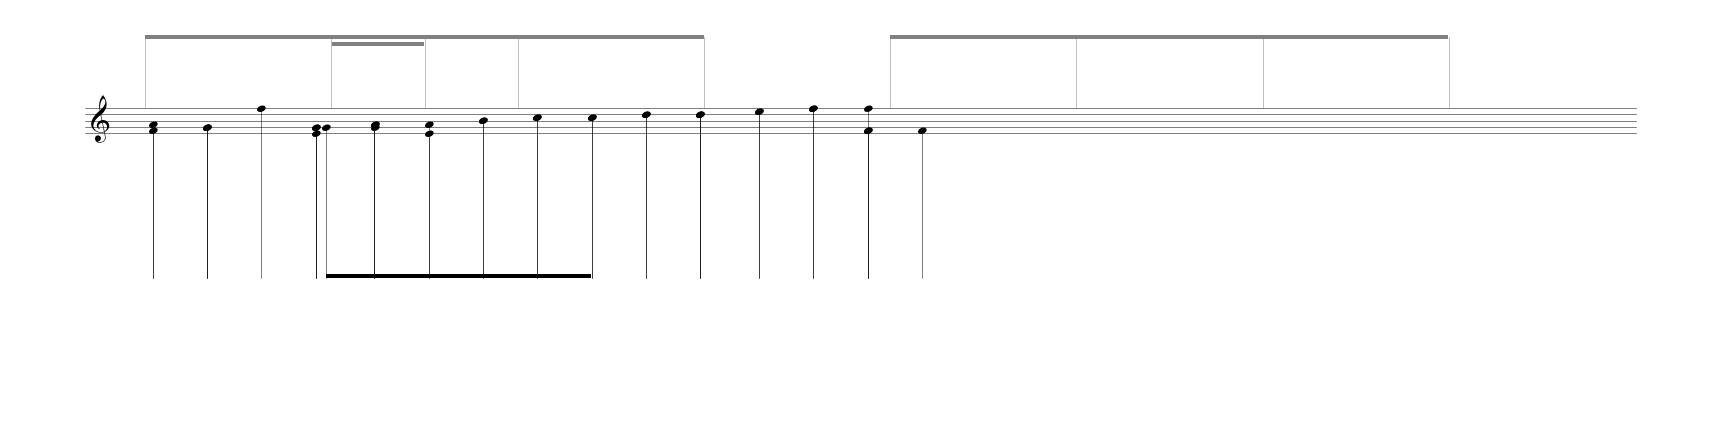

In [27]:
# mise-en-page
x_off = 0.4
y_off = 9.2
fig = plt.figure(figsize=(24, 6))
ax = plt.subplot(1, 1, 1)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# dictionaries
pitch_dict = { 40: -3.5+y_off, 41: -3+y_off, 42: -3+y_off, 43: -2.5+y_off, 44: -2.5+y_off, 45: -2+y_off, 46: -2+y_off, 47: -1.5+y_off, 48: -1+y_off,
               49: -1+y_off, 50: -0.5+y_off, 51: -0.5+y_off, 52: 0+y_off, 53: 0.5+y_off, 54: 0.5+y_off }
oct_dict = { 0: 0, 12: 3.5, 24: 7, 36: 10.5 }
pha_dict = { 1: x_off, 2: 1.235+x_off, 2.5: (1.235+0.6175)+x_off, 3: (1.235*2)+x_off, 4: (1.235*3)+x_off,
                5: (1.235*4)+x_off, 6: (1.235*5)+x_off, 7: (1.235*6)+x_off, 8: (1.235*7)+x_off }
pos_dict = { 'a': 1.0, 'b': 2.0, 'c': 3.0, 'd': 4.0, 'e': 5.0, 'f': 6.0, 'g': 7.0, 'h': 8.0, 'j': 9.0, 'k': 10.0, 'l': 11.0,
             'm': 12.0, 'n': 13.0, 'o': 14.0, 'p': 15.0, 'q': 16.0, 'r': 17.0, 's': 18.0, 't': 19.0 }

############DATA############
# arrays for data
chars = [ ]
x_moves = [ ]
y_moves = [ ]

x_pos = [ ]
y_pos = [ ]

#for other parameters
x_pos_1 = [ ]
y_pos_1 = [ ]
x_pos_2 = [ ]
y_pos_2 = [ ]
x_pos_3 = [ ]
y_pos_3 = [ ]

###################
#Read symbolic data
raw_data = pd.read_csv("/content/src/pix.csv", converters={"0":int})
chars = raw_data["0"].values.tolist()
size = len(chars)
#size = 11

x_moves = chars
y_moves = chars
print("chars: ", chars)
print("chars size: ", len(chars))

#Parameter proximity
moves_off_0 = 0 # take from the beginning
x_pos = x_moves[moves_off_0:]
y_pos = y_moves[moves_off_0:]
rhy_map  = [ ]
pi_map  = [ ]
print("y_pos", y_pos)

#noteheads
notes = ['f'] 
#cols = ['black']

pitches = [ ]
rhy_diff = [ ]
pit_diff = [ ]
octaves = [ ]
noteheads = [ ]
pitch_coll = [ ]
octave_coll = [ ]

###################
#MAPPING PARAMETERS
def paramMapping(pos, maptype, mini, maxi, rnd):
    for i in range(size):
        maptype.append(
            round((maxi-mini)*((pos[i] - min(pos)) / (max(pos) - min(pos)))+mini, rnd)
            )

paramMapping(x_pos, rhy_map, 0.15, 1.85, 2) #RHYTHM MAPPING between 0.15 and 1.5
paramMapping(y_pos, pi_map, 40.0, 54.0, 0) #PITCH MAPPING between 40 and 54
print("rhy_map", rhy_map)
print("pi_map", pi_map)

###################
#FIXED STUFF
#staff
X_1, Y_1 = np.linspace(0.06, 10.345, 10), np.zeros(10)

#measure lines
X_2, Y_2 = np.linspace(0, 0, 10), np.linspace(4, -38, 10)

#staff  plot
for i in range(5):
    ax.plot(X_1, y_off+Y_1+i, linestyle='solid', linewidth=0.5, color='black')

#octaves
octs = 12 

#Staff_offset
offset = 1.2 + x_off

#Treble clef
plt.text(0.1, 1.1+y_off, '&', fontproperties=fontprop2)

###################
#RHYTHM
rhythms = [offset]

#factoring
r_fac = 3.0
for i in range(size):
    rhythms.append(rhy_map[i]*r_fac)
print("rhythms: ", rhythms)

#PITCH
for i in range(size):
    pitches.append(pi_map[i]) #pitch list
    octaves.append(octs)
    
#Noteheads
    noteheads.append(random.choice(notes)) #for different noteheads  

#Phantom rhythms
phantoms = [1, 2, 2.5, 3, 4, 5, 6, 7, 8]
phan = [pha_dict[x] for x in phantoms]

#assign pitches
pitch_coll = [pitch_dict[x] for x in pitches]
octave_coll = [oct_dict[x] for x in octaves]

#graces = [pitch_dict[x] for x in gr_pit] #grace notes
print("pitch_coll: ", pitch_coll)

#Lower beams
conn = [ ] #for manual

#manually assign for this example
#conn.append(range(size))
#conn = sum(conn, [ ])

ax.plot(np.linspace((rhythms[0])+0.075, (rhythms[5])+0.04, 10), np.linspace(-13.1, -13.1, 10), linestyle='solid', linewidth=4, color='black'),

###################
######EVENTS######
for i in range(size):
  pitch = pitch_coll[i]
  rhythm = rhythms[i]
  oct_add = octave_coll[i]
  note_heads = noteheads[i]
  [
     plt.text(rhythm+0.035, pitch+oct_add, 'f', fontproperties=fontprop1, color='black'), #note
     ax.plot(np.linspace(rhythm+0.06, rhythm+0.06, 10), np.linspace((pitch+oct_add)-0.4, -13.3, 10),
     linestyle='solid', linewidth=0.5, color='black'),  #stem 
     ]
# oct_add = octa[i]

#phantom rhythms (TODO: let the user enter parameters, remove all the hardcoding)
for i in range(2):
    ax.plot(np.linspace(phan[i]+0.06, phan[i]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(1):
    ax.plot(np.linspace(phan[i+2]+0.06, phan[i+2]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(2):
    ax.plot(np.linspace(phan[i+3]+0.06, phan[i+3]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(1):
    ax.plot(np.linspace(phan[i+5]+0.06, phan[i+5]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(1):
    ax.plot(np.linspace(phan[i+6]+0.06, phan[i+6]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(2):
    ax.plot(np.linspace(phan[i+7]+0.06, phan[i+7]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems

[
    ax.plot(np.linspace((phan[0])+0.075, (phan[4])+0.045, 10), np.linspace(15+y_off, 15+y_off, 10), linestyle='solid', linewidth=4, color='gray'), #1
    ax.plot(np.linspace((phan[1])+0.075, (phan[2])+0.045, 10), np.linspace(14+y_off, 14+y_off, 10), linestyle='solid', linewidth=4, color='gray'), #1
    ax.plot(np.linspace((phan[5])+0.075, (phan[8])+0.04, 10), np.linspace(15+y_off, 15+y_off, 10), linestyle='solid', linewidth=4, color='gray'), #2
]

#global y-limits
ax.set_ylim(-35, 29) 

fig.set_tight_layout(True)
plt.yticks([])
plt.xticks([])

plt.show()


